In [1]:
import numpy as np

from cmath import sqrt, log, pi

from hazma.parameters import alpha_em
from hazma.parameters import pion_mass_chiral_limit as mPI
from hazma.parameters import kaon_mass_chiral_limit as mK
from hazma.parameters import rho_mass as mrho
from hazma.parameters import rho_width
from hazma.parameters import fpi, fv, gv, qe, vh

from hazma.unitarization.bethe_salpeter import amp_kk_to_kk_bse
from hazma.unitarization.bethe_salpeter import amp_pipi_to_kk_bse
from hazma.unitarization.bethe_salpeter import amp_pipi_to_pipi_bse
from hazma.unitarization.loops import bubble_loop

In [2]:
def __xx_s_pipig_E_no_fsi(Q, s, t, params):
    gsxx = params.gsxx
    gsGG = params.gsGG
    gsff = params.gsff
    mx = params.mx
    ms = params.ms
    vs = params.vs
    mrhoT = params.mrhoT

    return -(sqrt(2.)*gsxx*sqrt(-4.*mx**2 + Q**2)*qe *
             (fv*gsGG*gv*(mPI**2 - t)*(mPI**2 + Q**2 - s - t) *
              (3.*vh + 3.*gsff*vs + 2.*gsGG*vs)*(9.*vh + 4.*gsGG*vs) *
              (complex(0., 2.)*mrho**2*sqrt(mrho*(mrho - complex(0., 1.)*rho_width)) *
               (9.*vh + 2.*gsGG*vs) +
               2.*mrho*sqrt(mrho*(mrho - complex(0., 1.)*rho_width))*rho_width *
               (9.*vh + 2.*gsGG*vs) -
               complex(0., 1.)*s*(-9.*mrhoT*vh +
                                  sqrt(mrho*(mrho - complex(0., 1.)*rho_width)) *
                                  (9.*vh + 2.*gsGG*vs))) +
              complex(0., 3.)*fpi**2*mrhoT**2*sqrt(mrho*(mrho - complex(0., 1.)*rho_width)) *
              (mrho**2 - complex(0., 1.)*mrho*rho_width - s)*vh *
              (9.*gsff*(18.*gsGG*Q**2*vh*vs + mPI**2*(9.*vh + 8.*gsGG*vs)**2) +
               2.*gsGG*(27.*Q**2*vh*(3.*vh + 2.*gsGG*vs) +
                        mPI**2*(81.*vh**2 - 144.*gsGG*vh*vs - 64.*gsGG**2*vs**2))))) / \
            (81.*fpi**2*mrhoT**2*(ms**2 - Q**2)*sqrt(mrho*(mrho - complex(0., 1.)*rho_width)) *
             (mrho**2 - complex(0., 1.)*mrho*rho_width - s)*(mPI**2 - t)*vh**2 *
             (3.*vh + 3.*gsff*vs + 2.*gsGG*vs)*(9.*vh + 4.*gsGG*vs))

def msqrd_xx_s_pipig_no_fsi(Q, s, t, params):
    """Compute matrix element squared for xbar x -> s^* -> pi+ pi- g.

    Notes
    -----
    The matrix element for this process, M, is related to the form factor by
        |M|^2. = s Re[E(s,t,u) E^*(s,u,t)] - m_PI^2. |E(s,t,u) + E(s,u,t)|^2.
    """
    u = Q**2 + 2. * mPI**2 - s - t

    E_t = __xx_s_pipig_E_no_fsi(Q, s, t, params)
    E_u = __xx_s_pipig_E_no_fsi(Q, s, u, params)

    return s * (E_t * E_u.conjugate()).real - mPI**2 * abs(E_t + E_u)**2

In [30]:
e_gams, dN_dEs = gamma_ray_rambo([mk0], [mpi, mmu, 0., 0.], mk0,
                                 mat_elt_sqrd_k0_to_pi_l_nu,
                                 mat_elem_sqrd_rad=mat_elt_sqrd_k0_to_pi_l_nu_g,
                                 num_ps_pts=10000)

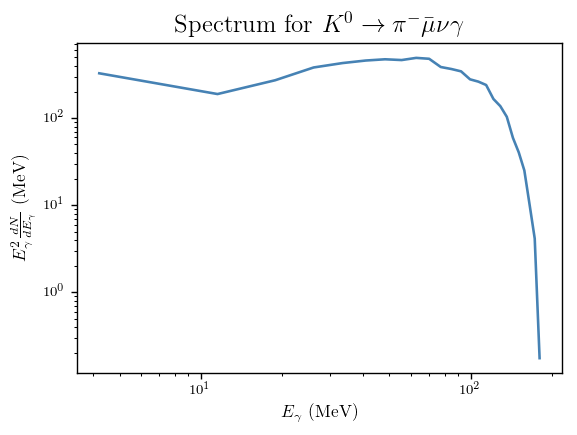

In [33]:
plt.loglog(e_gams, e_gams**2 * dN_dEs)
plt.title(r"Spectrum for $K^0 \to \pi^- \bar{\mu} \nu \gamma$")
plt.xlabel(r"$E_\gamma$ (MeV)")
plt.ylabel(r"$E_\gamma^2 \frac{dN}{dE_\gamma}$ (MeV)")

In [32]:
print("Average photon energy: %f MeV" % np.sum(dN_dEs[1:] * (e_gams[1:] - e_gams[:-1])))

Average photon energy: 31.008551 MeV
